**Tensor product and partial trace**

In [1]:
from qutip import *

psi = (tensor(basis(2, 0), basis(2, 0)) +
       tensor(basis(2, 1), basis(2, 1))).unit()
rho = psi * psi.dag()  # or ket2dm(psi)
rho_1, rho_2 = rho.ptrace(0), rho.ptrace(1)

print(f'psi = \n{psi}\n')
print(f'psi = \n{psi.full()}\n')
print(f'rho = \n{rho}\n')
print(f'rho = \n{rho.full()}\n')
print(f'rho_1 = \n{rho_1}\n')
print(f'rho_2 = \n{rho_2}\n')

psi = 
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

psi = 
[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]

rho = 
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]

rho = 
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]

rho_1 = 
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

rho_2 = 
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]



**Dynamics using QuTiP**

pops_1 = 
[1.         0.99000264 0.96109072 0.91541095 0.85570642 0.78516993
 0.70728617 0.62566973 0.54390604 0.46540194 0.39325197 0.3301234
 0.27816716 0.2389535  0.21343626 0.20194506 0.20420299 0.21937099
 0.24611136 0.28267054 0.32697429 0.37673147 0.42954211 0.48300354
 0.53481221 0.58285465 0.62528695 0.66059813 0.68765655 0.70573734
 0.71453202 0.71413956 0.70504114 0.68805982 0.66430809 0.6351261
 0.6020131  0.56655634 0.53035945 0.49497422 0.4618379  0.43221876
 0.40717132 0.38750333 0.37375436 0.36618727 0.3647914  0.36929729
 0.37920152 0.39379996 0.41222795 0.43350502 0.45658197 0.4803891
 0.50388155 0.52608255 0.54612076 0.56326126 0.57692985 0.58672817
 0.5924419  0.59403983 0.59166575 0.58562324 0.57635459 0.56441496
 0.55044313 0.53513025 0.519188   0.50331767 0.48818101 0.47437461
 0.46240808 0.45268718 0.44550215 0.44102143 0.43929106 0.44023895
 0.44368419 0.44935025 0.45688163 0.46586291 0.47583936 0.48633812
 0.49688903 0.50704424 0.51639604 0.52459169 0.53134557

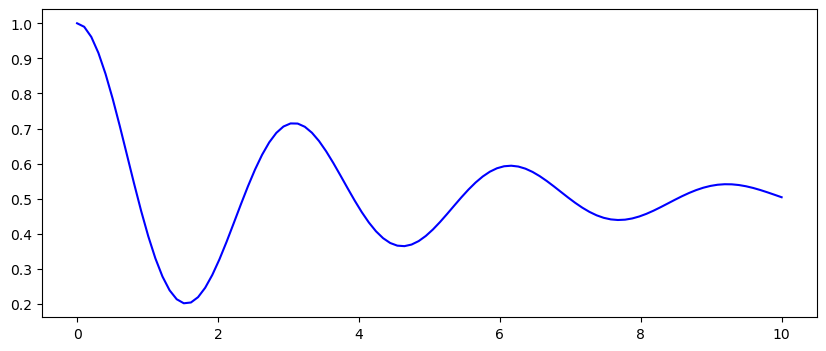

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

H = np.array([[0, 1], [1, 0.5]])
c_ops = [np.array([[1, 0], [0, 0]])]
rho0 = np.array([[1, 0], [0, 0]])

H = Qobj(H)
c_ops = [Qobj(c_op) for c_op in c_ops]

superop = liouvillian(H, c_ops)
rho0 = Qobj(rho0)

times_1 = np.linspace(0, 10, 100)
pops_1 = mesolve(H, rho0, times_1, c_ops, e_ops=[rho0]).expect[0]

print(f'pops_1 = \n{pops_1}\n')

# plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(times_1, pops_1, 'b-')

**Emission spectrum using QuTiP**

evals = 
[ 0.5 -0.5]

bohr_freqs = 
[-1.  0.  0.  1.]



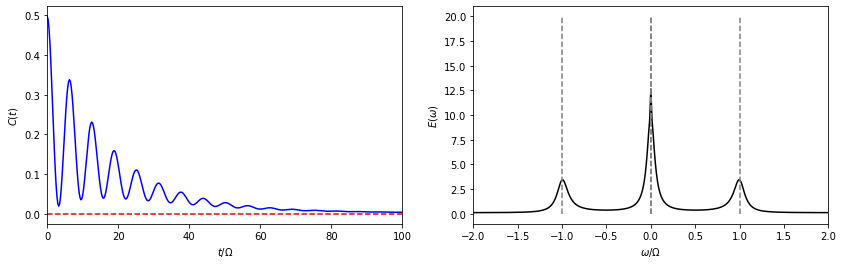

In [51]:
import qutip as qt

Omega, Gamma = 1.0, 0.1  # Rabi frequency and decay rate
sm = qt.sigmam()
sp = sm.dag()
H = np.array([[0, Omega], [Omega, 0]]) / 2
c_ops = [np.sqrt(Gamma) * sm]

N = 2000
times = np.linspace(0, 500, N)

corrs_qutip = qt.correlation_2op_1t(qt.Qobj(H),
                                    None,
                                    times,
                                    [qt.Qobj(op) for op in c_ops],
                                    sp, sm)

wlist_qutip, spect_qutip = qt.spectrum_correlation_fft(times, corrs_qutip)

# Transition energies
evals, _ = np.linalg.eig(H)
bohr_freqs = np.sort(np.array([a - b for a in evals
                               for b in evals]))

print(f'evals = \n{evals}\n')
print(f'bohr_freqs = \n{bohr_freqs}\n')

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(times/Omega, corrs_qutip.real, 'b-')
ax[0].plot(times/Omega, corrs_qutip.imag, 'r--')
ax[0].set_xlabel(r'$t/\Omega$')
ax[0].set_ylabel(r'$C(t)$')
ax[0].set_xlim(0, 100)

ax[1].plot(wlist_qutip, spect_qutip, 'k-')
ax[1].vlines(bohr_freqs, 0, 20, color='gray', linestyle='--')
ax[1].set_xlabel(r'$\omega/\Omega$')
ax[1].set_ylabel(r'$E(\omega)$')
ax[1].set_xlim(-2, 2)

plt.show()